In [4]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from pandas.plotting import scatter_matrix



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import log_loss, make_scorer




from sklearn.pipeline import Pipeline
from regression_tools.dftransformers import (
    ColumnSelector, Identity,
    FeatureUnion, MapFeature,
    StandardScaler)





# Custom Cross Validation Function

In [5]:
def crossVal(estimators, X_train, y_train, k=5):
    kf = KFold(n_splits = k, shuffle=True)
    splits = kf.split(X_train, y_train)
    scores = []
    
    for train_index, test_index in splits:
        score = []
        for estimator in estimators:
            X_train_fold, X_test_fold = X_train.values[train_index], X_train.values[test_index]
            y_train_fold, y_test_fold = y_train.values[train_index], y_train.values[test_index]
            estimator.fit(X_train_fold, y_train_fold)
            train_predicted = estimator.predict(X_train_fold)
            test_predicted = estimator.predict(X_test_fold)
            score.append(accuracy_score(y_test_fold, test_predicted))            
        scores.append(score)
    return np.array(scores)

# Load Complete Data Frame & Train Test Split

In [36]:
matchup_data = pd.read_csv("data/matchup_data.csv")

X = matchup_data[['diff_assists', 'diff_denies', 'diff_first_blood', 'diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_match_duration', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
#X = matchup_data[['diff_assists', 'diff_denies','diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
y = matchup_data.radiant_winner

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)




# Quick EDA

In [7]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('data/matchup_data.csv')
df


,match_id,Radiant,Dire,radiant_winner,diff_assists,diff_denies,diff_first_blood,diff_gpm,diff_healing,diff_hero_damage,diff_kills,diff_last_hits,diff_match_duration,diff_total_levels,diff_tower_damage,diff_xpm
0,3966654369,BlinkPool,OG,0,-17.477273,9.765734,75.382867,-6.552448,-5060.501748,-21543.166084,-7.489510,185.562937,146.246503,3.080420,1804.223776,-28.416084
1,3966744537,TNC Predator,BOOM ID,1,14.666667,-9.962963,58.074074,264.111111,-1991.703704,18138.333333,5.000000,240.148148,460.222222,14.074074,-1529.074074,265.222222
2,3966744778,Entity Gaming,ALPHA Red,1,6.222222,21.111111,-67.222222,11.222222,-3179.555556,-3491.444444,3.333333,-92.000000,-88.000000,-3.333333,2561.222222,19.777778
3,3966752666,Alliance,Team Kinguin,0,-2.746032,5.063492,-18.238095,-10.809524,-1570.301587,-3383.000000,-0.063492,-62.365079,-77.269841,-1.428571,2095.444444,-40.523810
4,3966788182,OG,Team Singularity,1,6.840909,-4.227273,15.931818,284.272727,1700.795455,10419.431818,4.363636,-5.500000,-181.022727,0.227273,3358.818182,177.590909
5,3966866578,Battle Arena Elites,Fnatic,0,-34.291667,-10.208333,18.875000,-527.375000,-4658.083333,-34260.166667,-16.583333,-365.125000,-614.125000,-22.750000,-7890.208333,-571.708333
6,3966884585,Entity Gaming,TNC Tigers,1,8.822222,8.311111,-60.855556,-85.344444,-3424.255556,-8600.411111,3.666667,-188.866667,-427.633333,-6.666667,-1471.511111,35.277778
7,3966957407,Wind and Rain,The Final Tribe,1,18.625000,20.937500,-47.937500,306.125000,67.125000,-3556.906250,10.625000,-7.687500,-136.656250,1.375000,7705.312500,252.968750
8,3966977095,Alliance,BlinkPool,0,16.476190,-6.586081,-47.007326,-80.347985,2385.424908,23834.461538,6.688645,-22.630037,232.516484,0.263736,-2086.102564,-45.062271
9,3967002678,Sterling Global Dragons,BOOM ID,0,5.333333,-17.000000,23.000000,-15.333333,-1136.333333,8243.333333,2.666667,-33.666667,233.333333,7.333333,-3393.666667,88.666667


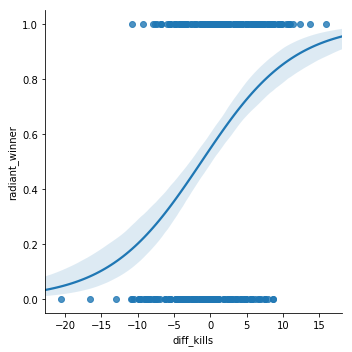

In [8]:
g = sns.lmplot(x="diff_kills", y="radiant_winner", data=df, logistic=True)

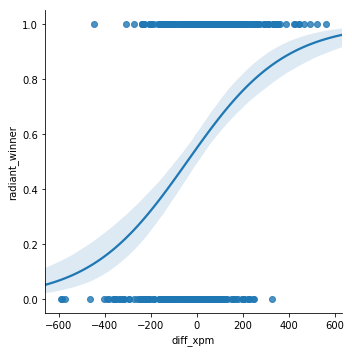

In [9]:
g = sns.lmplot(x="diff_xpm", y="radiant_winner", data=df, logistic=True)

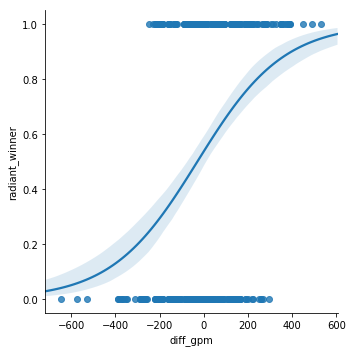

In [10]:
g = sns.lmplot(x="diff_gpm", y="radiant_winner", data=df, logistic=True)

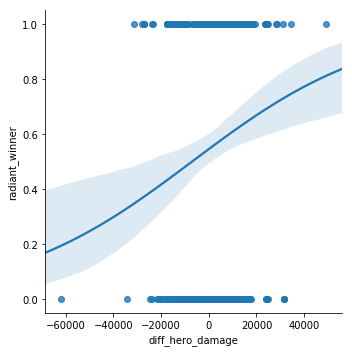

In [11]:
g = sns.lmplot(x="diff_hero_damage", y="radiant_winner", data=df, logistic=True)

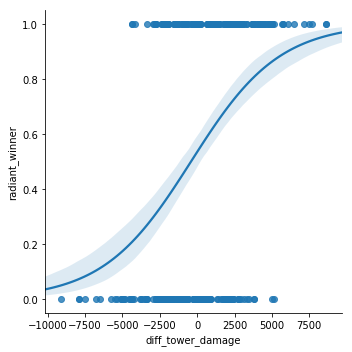

In [12]:
g = sns.lmplot(x="diff_tower_damage", y="radiant_winner", data=df, logistic=True)


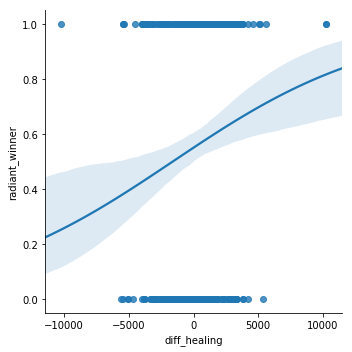

In [13]:
g = sns.lmplot(x="diff_healing", y="radiant_winner", data=df, logistic=True)

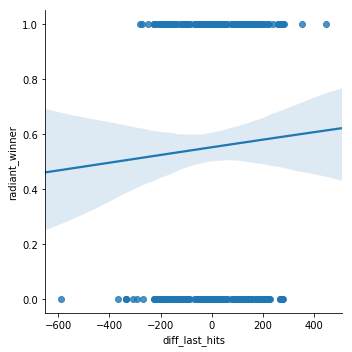

In [14]:
g = sns.lmplot(x="diff_last_hits", y="radiant_winner", data=df, logistic=True)

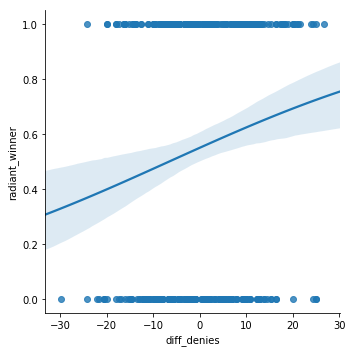

In [15]:
g = sns.lmplot(x="diff_denies", y="radiant_winner", data=df, logistic=True)

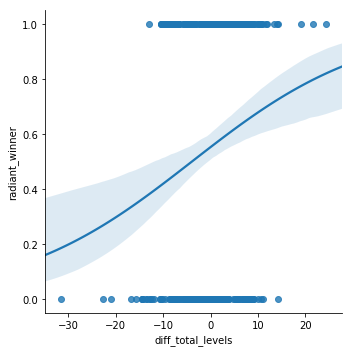

In [16]:
g = sns.lmplot(x="diff_total_levels", y="radiant_winner", data=df, logistic=True)

# Logistic Regression


In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

lr_Train = accuracy_score(y_train, train_predicted)
lr_Test = accuracy_score(y_test, test_predicted)
print(lr_Train, lr_Test)
lr_prediction = dict()

lr_prediction['Logistic'] = lr.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, lr_prediction['Logistic']))
print(lr.coef_)

conf_mat_logist = confusion_matrix(y_test, lr_prediction['Logistic'])
print(conf_mat_logist)


0.7254901960784313 0.6111111111111112
Accuracy:  0.6111111111111112
[[ 2.37282601e-04 -3.50810670e-02 -2.51855959e-03  4.37705372e-03
   1.55754290e-05 -2.37475064e-05  8.09803865e-02 -4.31927134e-03
   2.80187427e-03 -1.21026329e-01  1.69512956e-04  3.63197375e-03]]
[[28 22]
 [27 49]]


# K Nearest Neighbor Classifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

train_predicted = knn.predict(X_train)
test_predicted = knn.predict(X_test)

knn_Train = accuracy_score(y_train, train_predicted)
knn_Test = accuracy_score(y_test, test_predicted)
print(knn_Train, knn_Test)

knn_prediction = dict()

knn_prediction['Logistic'] = knn.predict(X_test)

print('Log: ',accuracy_score(y_test, knn_prediction['Logistic']))


knn_conf_mat_logist = confusion_matrix(y_test, knn_prediction['Logistic'])
print( knn_conf_mat_logist)


0.6784313725490196 0.5793650793650794
Log:  0.5793650793650794
[[30 20]
 [33 43]]


[0.5930499325236167, 0.5774628879892038, 0.5775978407557354, 0.5960188933873144, 0.5880566801619433, 0.5724696356275304, 0.5803643724696356, 0.5699055330634277, 0.5933198380566801, 0.5855600539811066, 0.6065452091767881, 0.6012820512820513, 0.6248313090418354, 0.6167341430499325, 0.6378542510121458, 0.6456815114709851, 0.6327260458839407, 0.6352901484480432, 0.6274628879892038, 0.6116734143049932, 0.6222672064777328, 0.6089743589743589, 0.608974358974359, 0.608974358974359, 0.6143049932523617, 0.6064102564102564, 0.6143724696356275, 0.6195006747638326, 0.6275303643724698, 0.6352901484480433]


Text(0,0.5,'Cross-Validated Accuracy')

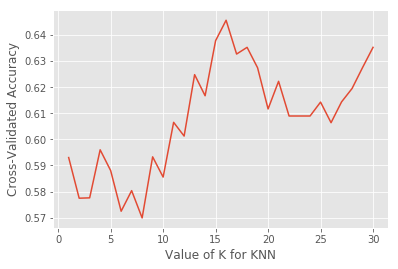

In [69]:
# Find Best Value for K

k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Random Forest Classifier

In [65]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

train_predicted = rf.predict(X_train)
test_predicted = rf.predict(X_test)

rf_Train = accuracy_score(y_train, train_predicted)
rf_Test = accuracy_score(y_test, test_predicted)
print(rf_Train, rf_Test)

rf_prediction = dict()

rf_prediction['Logistic'] = rf.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, rf_prediction['Logistic']))


rf_conf_mat_logist = confusion_matrix(y_test, rf_prediction['Logistic'])
print(rf_conf_mat_logist)



0.9058823529411765 0.6349206349206349
Accuracy:  0.6349206349206349
[[28 22]
 [24 52]]


# Gradient Boosting Classifier

In [53]:
gdbc = GradientBoostingClassifier(random_state=1)
gdbc.fit(X_train, y_train)

train_predicted = gdbc.predict(X_train)
test_predicted = gdbc.predict(X_test)

gdbc_Train = accuracy_score(y_train, train_predicted)
gdbc_Test = accuracy_score(y_test, test_predicted)
print(gdbc_Train, gdbc_Test)

gdbc_prediction = dict()

gdbc_prediction['Logistic'] = gdbc.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, gdbc_prediction['Logistic']))


gdbc_conf_mat_logist = confusion_matrix(y_test, gdbc_prediction['Logistic'])
print(gdbc_conf_mat_logist)



0.9098039215686274 0.6428571428571429
Accuracy:  0.6428571428571429
[[28 22]
 [23 53]]


# Cross Validation

In [12]:
estimators = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=16)]
scores = crossVal(estimators, X_train, y_train, k=10)
scores

array([[0.57692308, 0.69230769, 0.61538462, 0.5       ],
       [0.61538462, 0.53846154, 0.65384615, 0.53846154],
       [0.69230769, 0.69230769, 0.84615385, 0.5       ],
       [0.73076923, 0.73076923, 0.80769231, 0.61538462],
       [0.5       , 0.61538462, 0.57692308, 0.65384615],
       [0.64      , 0.52      , 0.52      , 0.64      ],
       [0.72      , 0.56      , 0.68      , 0.64      ],
       [0.84      , 0.72      , 0.76      , 0.84      ],
       [0.72      , 0.72      , 0.72      , 0.6       ],
       [0.64      , 0.72      , 0.8       , 0.68      ]])

In [102]:
np.mean(scores, axis=0)

array([0.68323077, 0.64784615, 0.67138462, 0.63246154])

# Grid Search


In [60]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [63]:
# Grid Search for best hyperparameters (Random Forest)
random_forest_grid = {'max_depth': [3,4,5,None],
                      'max_features': ['sqrt', 'log2', 'auto'],
                      'min_samples_leaf': [1, 2, 4, 8],
                       'n_estimators': [10, 20, 40, 80, 100], 'random_state':[1]}

rf_gridsearch = GridSearchCV(rf,
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             cv=5,
                             scoring='accuracy')

rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1036 tasks      | elapsed:   14.1s


best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 10, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   16.5s finished


In [21]:
# Grid Search for best hyperparameters (GradientBoostClassifier)
gradient_boost_grid = {'max_depth': [3,4,5,None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_leaf': [1, 2, 4, 8],
                       'n_estimators': [40, 80,100,200,400],'random_state':[1]}

gdbc_gridsearch = GridSearchCV(gdbc,
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             cv=5,
                             scoring='accuracy')

gdbc_gridsearch.fit(X_train, y_train)

print("best parameters:", gdbc_gridsearch.best_params_)

best_gdbc_model = gdbc_gridsearch.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 1166 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   37.1s finished


best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 200, 'random_state': 1}


# Optimized Random Forest and Boosting Models

In [62]:
best_rf = RandomForestClassifier(max_depth=5, max_features='sqrt',
                                min_samples_split=2, min_samples_leaf=4,
                                bootstrap=True, n_estimators=10,
                                n_jobs=-1, random_state=1)

best_rf.fit(X_train, y_train)

train_predicted = best_rf.predict(X_train)
test_predicted = best_rf.predict(X_test)
best_rf_train, best_rf_test =accuracy_score(y_train, train_predicted), accuracy_score(y_test, test_predicted)
print(f"Model: Best RandomForestClassifier\tTestCV\tAccuracy_train:{best_rf_train}\tAccuracy_test:{best_rf_test}")

Model: Best RandomForestClassifier	TestCV	Accuracy_train:0.8274509803921568	Accuracy_test:0.626984126984127


In [55]:

best_gdbc = GradientBoostingClassifier(max_depth= None, max_features='sqrt',
                                        min_samples_leaf=2,
                                        n_estimators=200,
                                        random_state=1)
best_gdbc.fit(X_train, y_train)

# Call predict to get the predicted values for training and test set
train_predicted = best_gdbc.predict(X_train)
test_predicted = best_gdbc.predict(X_test)

# log-loss score calcs for training and test
best_gdbc_train = accuracy_score(y_train, train_predicted)
best_gdbc_test = accuracy_score(y_test, test_predicted)
print(f"Model: Best GradientBoostingClassifier\tTestCV\tAccuracy_train:{best_gdbc_train}\tAccuracy_test:{best_gdbc_test}")

Model: Best GradientBoostingClassifier	TestCV	Accuracy_train:0.9098039215686274	Accuracy_test:0.6587301587301587


Initial RF Score:    0.6349206349206349

Optimized RF Score:  0.626984126984127

Initial GDBC Score:  0.6428571428571429

Optimized GDBC Score:0.6587301587301587



# Feature Importance


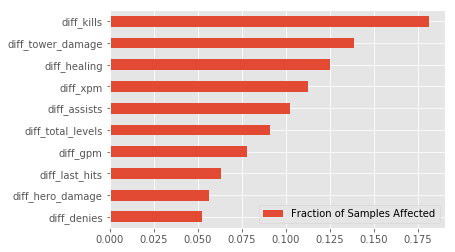

In [103]:
# Feature Importances(RF)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

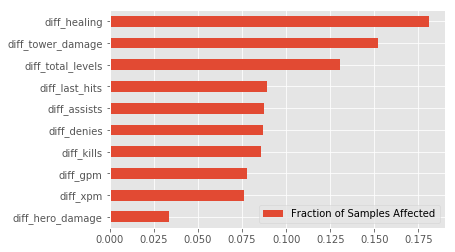

In [104]:
# Feature Importances(GB)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gdbc.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

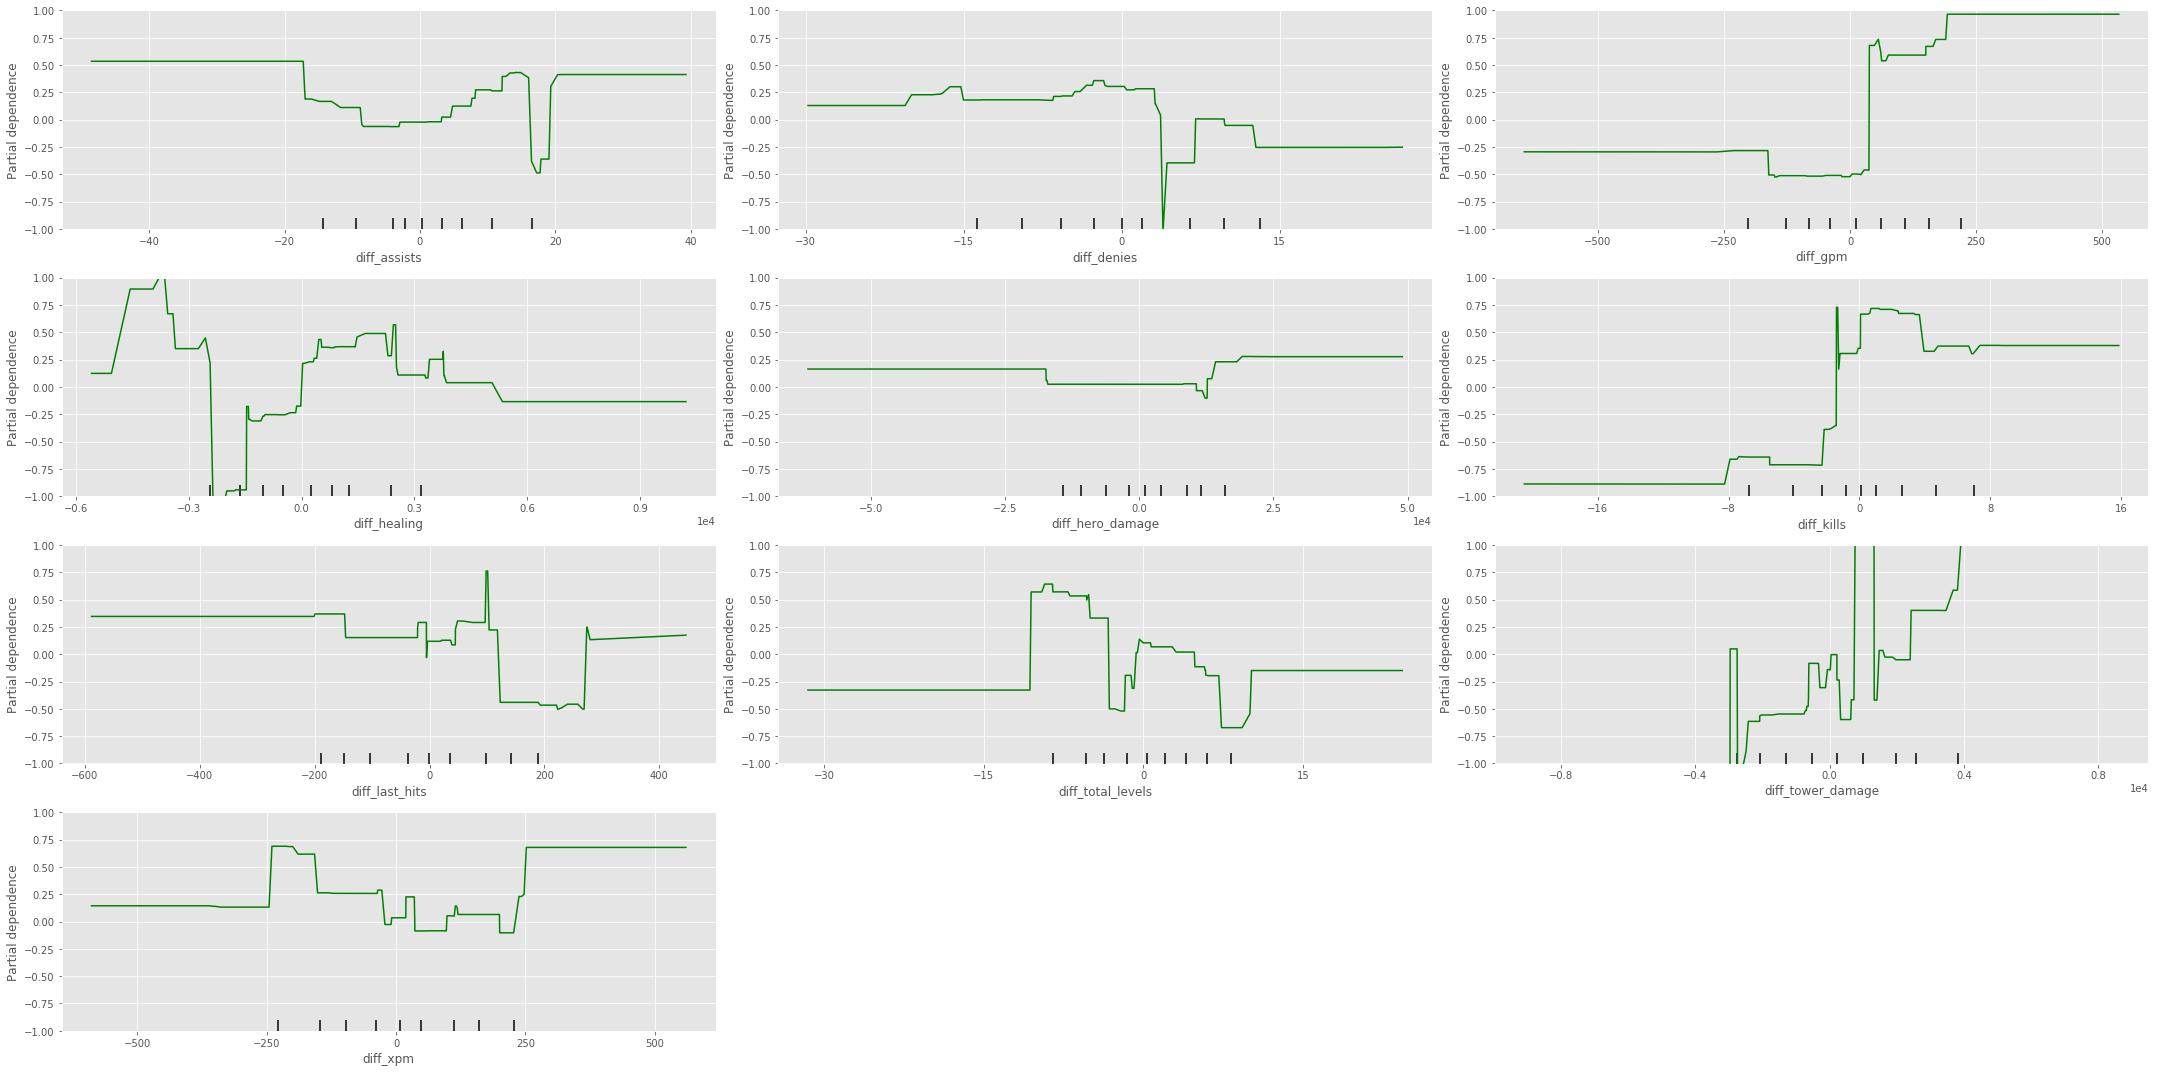

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.ensemble.partial_dependence import plot_partial_dependence

var_names = X_train.columns
features = list(range(X_train.shape[1]))
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

fig, axs = plot_partial_dependence(gdbc, X_train, features,
                                       feature_names=var_names,
                                       n_jobs=3, grid_resolution=250, figsize=(30, 15))
for ax in axs:
    ax.set_ylim([-1, 1])
fig.tight_layout()